### Chatbot

In [1]:
#Used in Tensorflow Model
import numpy as np
import tensorflow as tf
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk 
# from nltk.tokenize import  word_tokenize
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [3]:
words = []
classes = []
documents = []
ignore_words = ['?']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = pattern.split()
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [4]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
104 documents
26 classes ['Identity', 'actvation_type', 'ann_activation_function', 'ann_backpropagation', 'ann_convolutional_networks', 'ann_history', 'ann_intro', 'ann_overfitting', 'ann_relu', 'ann_structure', 'ann_topology', 'ann_training', 'biological_nn', 'chatbot', 'creation', 'feedforward', 'genetic_algo_nn', 'greeting', 'help', 'hours', 'jokes', 'name', 'show_graph', 'sigmoid', 'sigmoid_g', 'thanks']
120 unique stemmed words ['(cnns)?', 'a', 'about', 'act', 'adv', 'algorithm', 'algorithm?', 'am', 'an', 'and', 'ann?', 'anns?', 'anyon', 'apply', 'ar', 'art', 'avoid', 'awesome,', 'backprop', 'between', 'biolog', 'bnn', 'by', 'can', 'cnns', 'cnns?', 'common', 'compon', 'convolv', 'cre', 'created?', 'day', 'developed?', 'diff', 'display', 'do', 'do?', 'doe', 'explain', 'fath', 'favourit', 'feedforward', 'first', 'for', 'funct', 'function?', 'functions?', 'genet', 'go', 'good', 'graph', 'graph?', 'hello', 'help', 'help?', 'hi', 'hist'

In [5]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [6]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Train and Test Lists.....")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.compat.v1.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Train and Test Lists.....
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [7]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Training....


In [8]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [9]:
print("Training the Model.......")
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the Model.......")
model.save('model.tflearn')


Training Step: 12999  | total loss: 0.06693 | time: 0.043s
| Adam | epoch: 1000 | loss: 0.06693 - acc: 0.9833 -- iter: 096/104
Training Step: 13000  | total loss: 0.06173 | time: 0.043s
| Adam | epoch: 1000 | loss: 0.06173 - acc: 0.9850 -- iter: 104/104
--
Saving the Model.......
INFO:tensorflow:c:\Users\Avishi Sharma\Desktop\AI_ChatBot_Python-master (3)\AI_ChatBot_Python-master\rasa\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [10]:
print("Pickle is also Saved..........")
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [11]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
print("Loading the Model......")
# load our saved model
model.load('./model.tflearn')

Loading Pickle.....
Loading the Model......
INFO:tensorflow:Restoring parameters from c:\Users\Avishi Sharma\Desktop\AI_ChatBot_Python-master (3)\AI_ChatBot_Python-master\rasa\model.tflearn


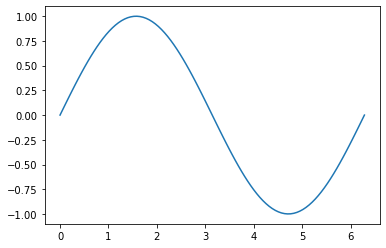

In [15]:
from IPython.display import display, Image
import random
import numpy as np
import matplotlib.pyplot as plt

def create_graph():
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x)
    plt.plot(x, y)
    plt.savefig('graph.png')
create_graph()
import matplotlib.pyplot as plt 
import numpy as np 



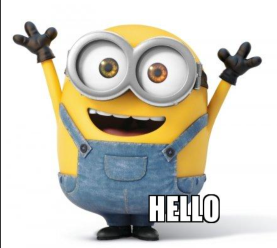

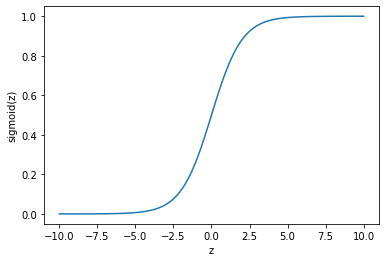

In [16]:
from IPython.display import display, Image
import matplotlib.pyplot as plt 
import numpy as np 

z = np.linspace(-10, 10, 100) 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

a = sigmoid(z)
plt.plot(z, a) 
plt.xlabel("z") 
plt.ylabel("sigmoid(z)")
plt.savefig('sigmoid.png')
display(Image('hello2.png'))

In [17]:
from IPython.display import display, Image
import random
import numpy as np
import matplotlib.pyplot as plt

def create_graph():
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x)
    plt.plot(x, y)
    plt.savefig('graph.png')

def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = sentence.split()
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.25
print("ERROR_THRESHOLD = 0.25")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list
   
    
def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                if i['tag'] == results[0][0]:
                    if i['tag'] == 'show_graph':
                        display(Image('graph.png'))
                        return
                    elif i['tag'] == 'greeting':
                        display(Image('hello2.png'))
                        return print(random.choice(i['responses']))
                    elif i['tag'] == 'ann_intro':
                        display(Image('tyann.png'))
                        return print(random.choice(i['responses']))
                    elif i['tag'] == 'sigmoid_g':
                        display(Image('sigmoid.png'))
                        return
                    else :
                        return print(random.choice(i['responses']))
                elif i['tag'] == results[0][0] and i['tag'] == 'show_graph':
                    create_graph()
                    print("Here tis the graph")
                    display(Image('graph.png'))
                    
                elif i['tag'] == results[0][0] and i['tag'] == 'sigmoid':
                    create_graph()
                    print("Here tis the graph")
                    display(Image('sigmoid.png'))
                    
                
                

            results.pop(0)

ERROR_THRESHOLD = 0.25


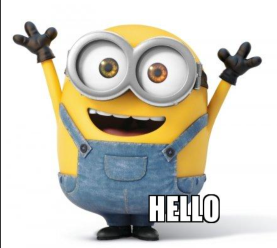

Hi there, how can I help?


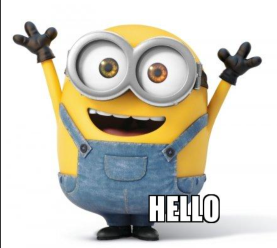

Hi there, how can I help?


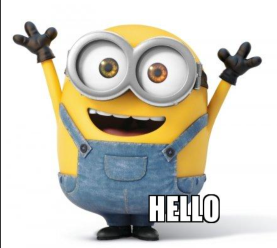

Hi there, how can I help?


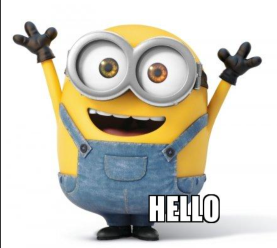

Hi there, how can I help?
A feedforward network is structured as a series of layers of artificial neurons, with each layer connected to the next in a one-way direction. The input data is fed into the input layer, and the output is produced by the output layer.
I am Ted, a Deep-Learning chatbot
I am Ted, a Deep-Learning chatbot


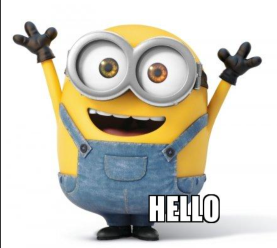

Hi there, how can I help?


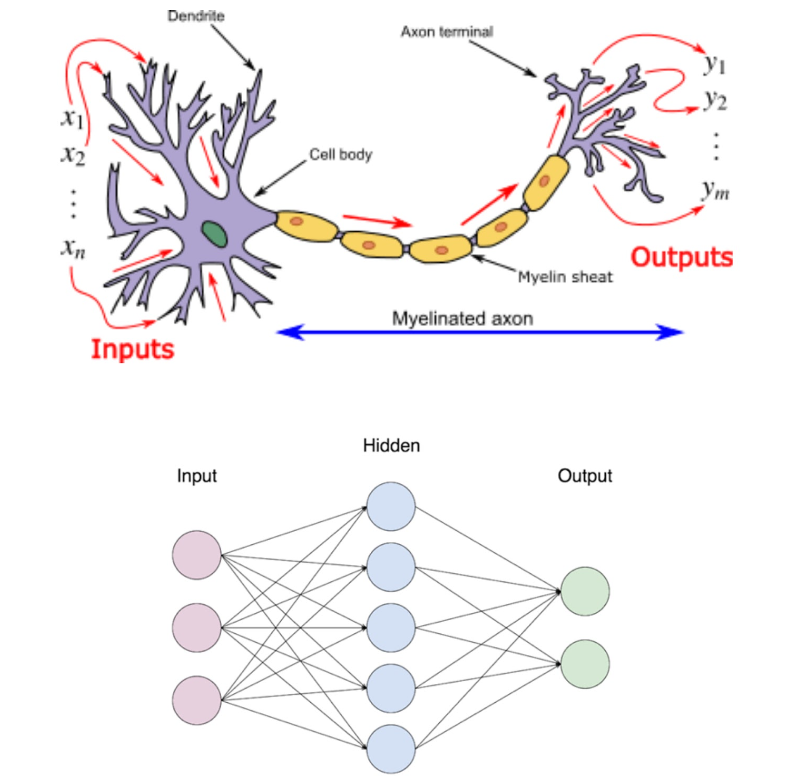

An ANN is a type of machine learning algorithm that can be used to learn patterns in data and make predictions.


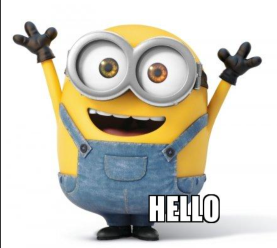

Hi there, how can I help?


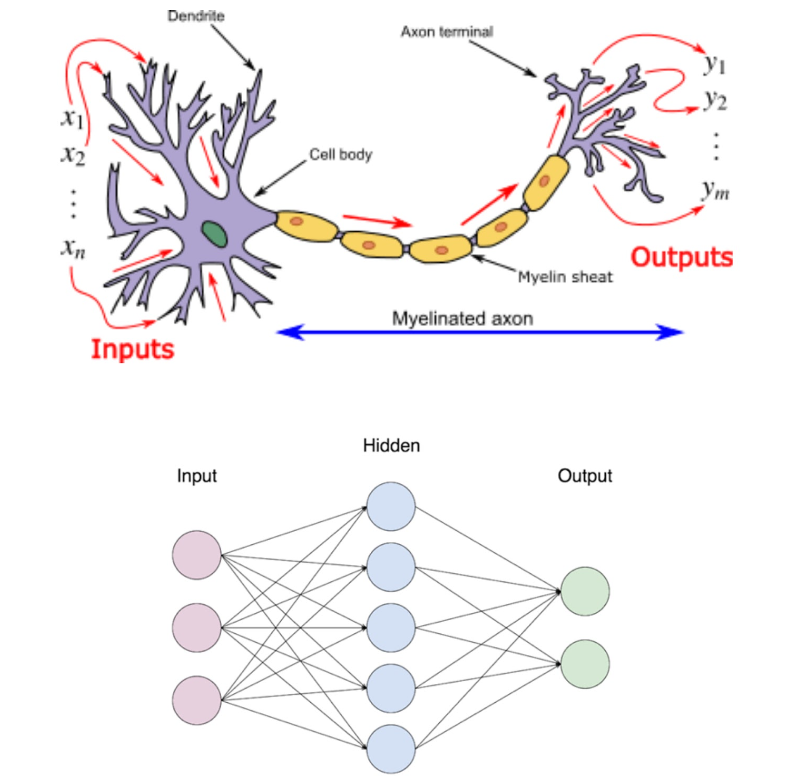

An Artificial Neural Network (ANN) is a computational model based on the structure and function of the human brain. It is used to learn and make predictions from data.


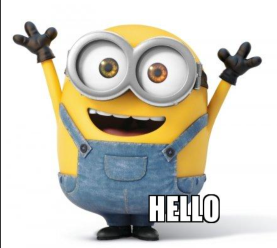

Hi there, how can I help?
I am Ted, a Deep-Learning chatbot
I was trained on a text dataset using Deep Learning & Natural Language Processing techniques


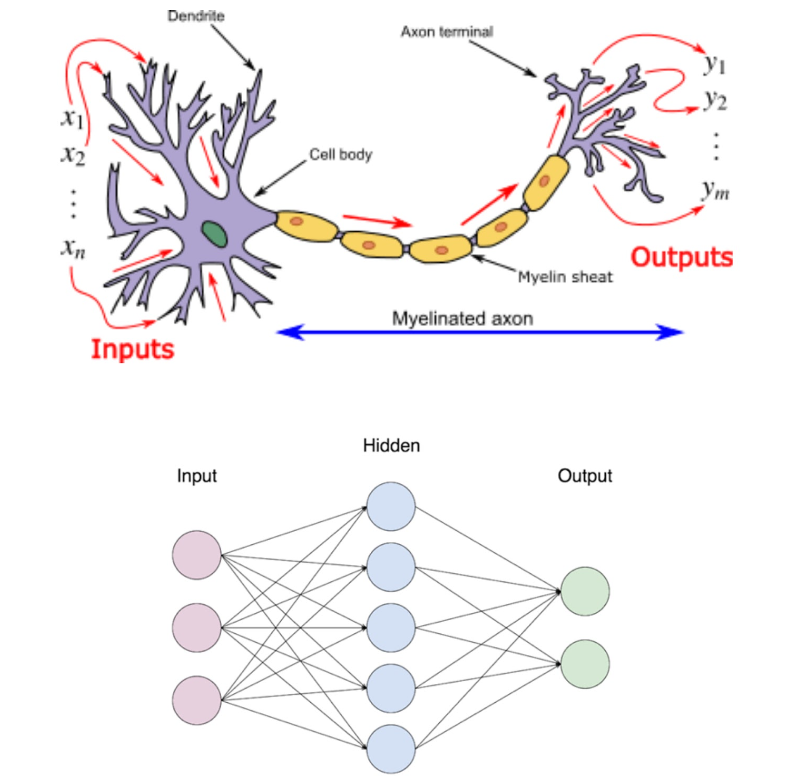

An ANN is a type of machine learning algorithm that can be used to learn patterns in data and make predictions.


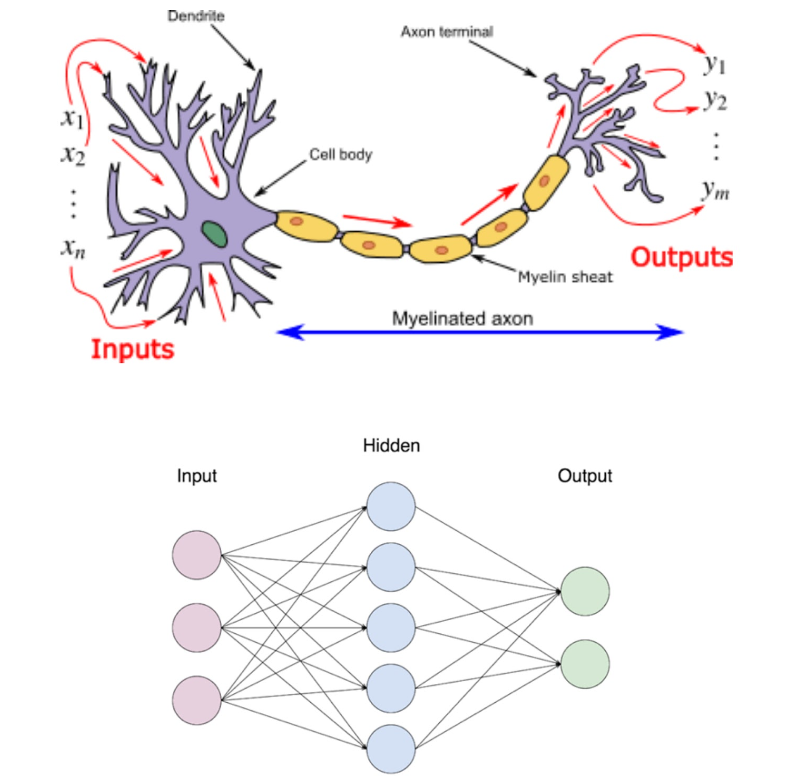

An Artificial Neural Network (ANN) is a computational model based on the structure and function of the human brain. It is used to learn and make predictions from data.
The ReLU function is used in ANNs because it is a good choice for introducing non-linearity into the network, especially in deep learning architectures. It is also computationally efficient.


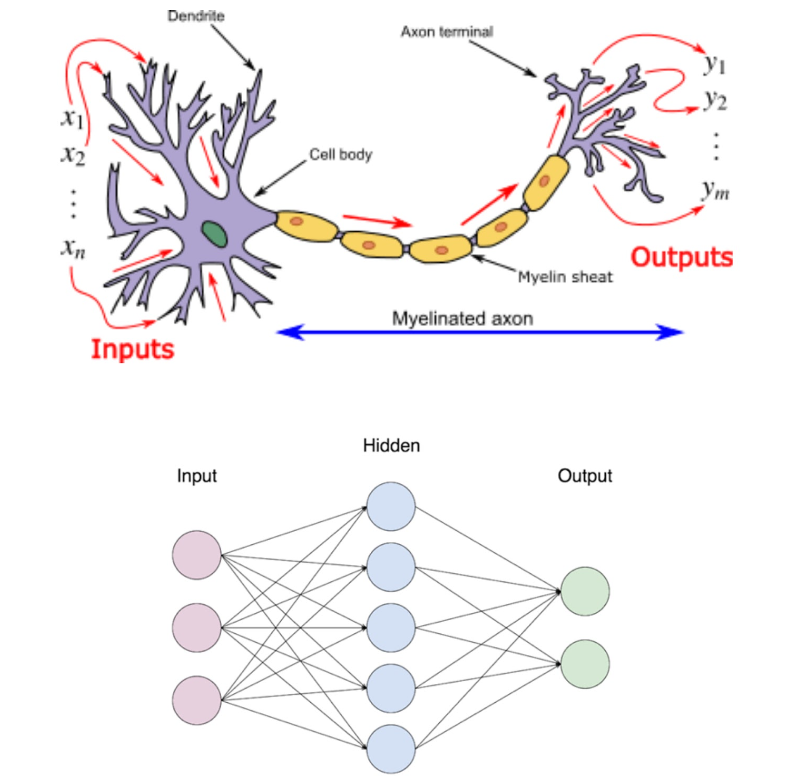

An ANN is a machine learning model that can learn from and make predictions on data. It is inspired by the way the human brain processes information.
Our hours are 9am-9pm every day
We're open every day 9am-9pm
There are several types of Activation functions 
 1 Linear 
  2 Step-function 
  3 Sigmoid 
  4 Relu 
  5 Tanh 
  6 Hyberbolic tangent 
  7 Identity
The ReLU function is a popular activation function used in Artificial Neural Networks. It maps the input values to a range between 0 and infinity, and is particularly effective in deep learning architectures.


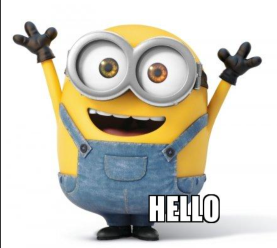

Hi there, how can I help?


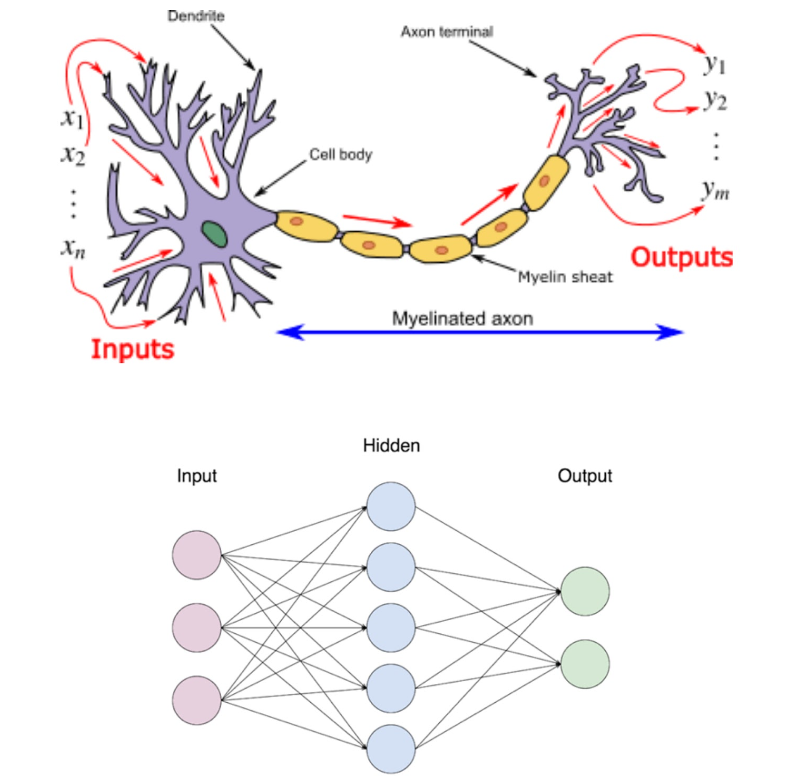

An Artificial Neural Network (ANN) is a computational model based on the structure and function of the human brain. It is used to learn and make predictions from data.


In [18]:
while True:
    input_data = input("You- ")
    answer = response(input_data)
    answer